In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from REACTRL.env_modules.get_atom_coordinate import *

In [17]:
img1 = cv2.imread('image1.png')[:,:,0]
img2 = cv2.imread('image2.png')[:,:,0]
# img1_gray=cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [353]:
iodine = cv2.imread('iodine.png')
beneze = cv2.imread('beneze.png')
iodinebeneze = cv2.imread('iodinebeneze.png')
iodine_beneze = cv2.imread('iodine_beneze.png')
two_beneze = cv2.imread('two_beneze.png')
biphenyl = cv2.imread('biphenyl.png')

In [364]:
img = cv2.imread('iodine_beneze.png')

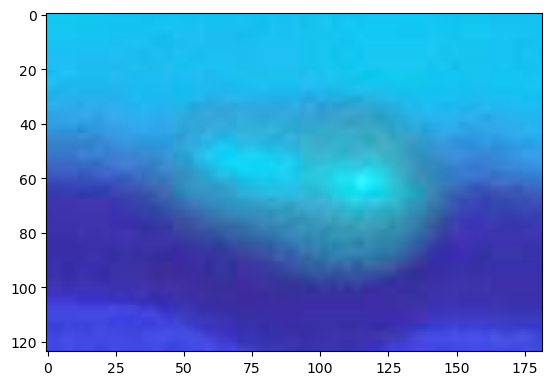

In [365]:
plt.imshow(img)

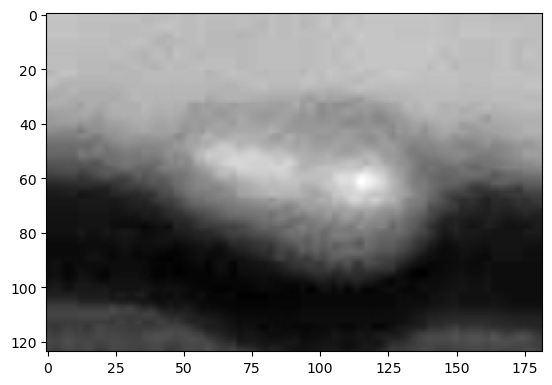

In [366]:
img = cv2.imread('iodine_beneze.png')
dark_image_grey=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(dark_image_grey, cmap='gray')

In [367]:
blur = cv2.GaussianBlur(img, (7, 7), 2)
h, w = img.shape[:2]

# Morphological gradient

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
gradient = cv2.morphologyEx(blur, cv2.MORPH_GRADIENT, kernel)
cv2.imshow('Morphological gradient', gradient)
cv2.waitKey(10)

-1

In [369]:
lowerb = np.array([0, 0, 0])
upperb = np.array([15, 15, 15])
binary = cv2.inRange(gradient, lowerb, upperb)
cv2.imshow('Binarized gradient', binary)
cv2.waitKey(10)

-1

In [370]:
for row in range(h):
    if binary[row, 0] == 255:
        cv2.floodFill(binary, None, (0, row), 0)
    if binary[row, w-1] == 255:
        cv2.floodFill(binary, None, (w-1, row), 0)

for col in range(w):
    if binary[0, col] == 255:
        cv2.floodFill(binary, None, (col, 0), 0)
    if binary[h-1, col] == 255:
        cv2.floodFill(binary, None, (col, h-1), 0)

cv2.imshow('Filled binary gradient', binary)
cv2.waitKey(10)

-1

In [371]:
foreground = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
foreground = cv2.morphologyEx(foreground, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Cleanup up crystal foreground mask', foreground)
cv2.waitKey(10)

-1

In [372]:

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
background = cv2.dilate(foreground, kernel, iterations=3)
unknown = cv2.subtract(background, foreground)
cv2.imshow('Background', background)
cv2.waitKey(10)
cv2.destroyAllWindows()

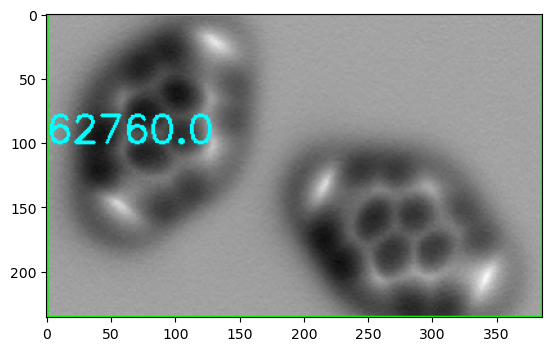

In [54]:
plt.imshow(img)

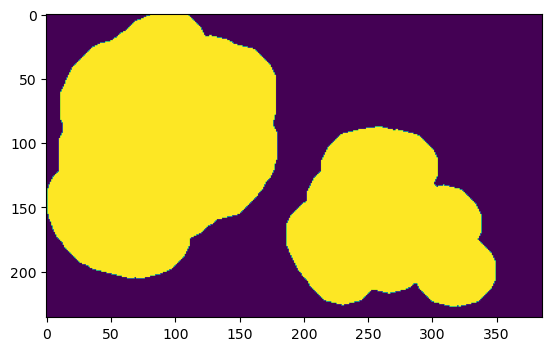

In [59]:
plt.imshow(background)


In [47]:
from matplotlib.patches import Ellipse

def plot_ellipse(ax, x, y, w, h, a, color):
    """
    Plot an ellipse.
    """
    ell = Ellipse(xy=(x, y), width=w, height=h, angle=a, color=color)
    ell.set_facecolor('none')
    ax.add_artist(ell)

In [ ]:
plot_ellipse(264, 163, 134, 163, 115, (0, 0, 255))

In [39]:
# cv2.ellipse(img, (109.66650390625, 105.74824523925781), (188.27984619140625, 395.2646179199219), 0, 0, 360, (0, 0, 255), -1)
cv2.ellipse(background, (264, 163), (134, 163), 115, 0, 360, (0, 0, 255), -1)
cv2.imshow('ellipse', background)
cv2.waitKey(10)
# cv2.destroyAllWindows()

-1

In [36]:
cv2.imshow('img', img)

In [150]:
cv2.fitEllipse(cnt)

((109.66650390625, 105.74824523925781),
 (188.27984619140625, 395.2646179199219),
 90.43791961669922)

In [13]:
xy

(71.65994262695312, 51.000091552734375)

In [30]:
u=xy[0]
v=xy[1]
a=width_height[0]
b=width_height[1]
ang=30/180*np.pi

In [32]:
t

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [373]:

from math import pi, cos, sin
def ellipse(x, y, width, height, angle=None, rotation=0):
    
    """
    desscribe a simple or thick elliptic arc or fills an ellipse sector.
    """

    arc_rot = rotation * np.pi / 180.0
    # angle = angle * np.pi / 180.0

    if angle is None:
       angle = np.linspace(0, 2*pi, 100)
    else:
       angle = angle * np.pi / 180.0
    Ell = np.array([x+width*np.cos(angle) , y+height*np.sin(angle)])  
    #u,v removed to keep the same center location
    R_rot = np.array([[cos(arc_rot) , -sin(arc_rot)],[sin(arc_rot) , cos(arc_rot)]])  
    # print(R_rot)
    #2-D rotation matrix


    # Ell_rot = np.zeros((2,1))
    # Ell_rot = np.dot(R_rot,Ell)
    if type(angle) is np.ndarray:
        Ell_rot = np.zeros((2,Ell.shape[1]))
        for i in range(Ell.shape[1]):
            Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    else:
        Ell_rot = np.zeros(2)
        Ell_rot = np.dot(R_rot,Ell)

    return Ell_rot

In [345]:
select=ellipse(0, 0, 18, 10, angle=np.array([0, 90, 180, 270,360]), rotation=0)

In [341]:
select[0]

array([ 18.        ,  -8.06532509, -10.77228124,  17.71887511,
        -5.10643965])

In [342]:
select[1]

array([ 0.        ,  8.93996664, -8.01152636, -1.76045946,  9.58915723])

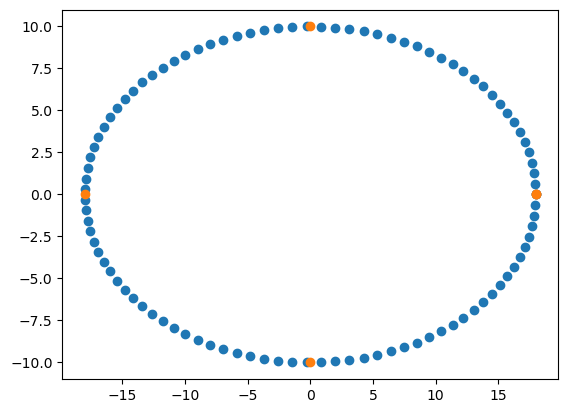

In [348]:
ttt=ellipse(0, 0, 18, 10, rotation=0)
# new=[[ttt[0][i],ttt[1][i]] for i in range(len(ttt[0]))]
# new=np.array(new)
# plt.scatter(new[:,0],new[:,1])
plt.scatter(ttt[0],ttt[1])
plt.scatter(select[0],select[1])

In [322]:
kkk=ellipse(0, 0, 18, 10, angle=np.array([140, 320]), rotation=50)

In [324]:
kkk=ellipse(0, 0, 18, 10, angle=np.array([90, 270]), rotation=0)

In [331]:
cdist(new, new)

array([[ 0.        , 27.91637689],
       [27.91637689,  0.        ]])

In [298]:
ellipse(0, 0, 18, 10, angle=0, rotation=0)

array([18.,  0.])

In [297]:
ellipse(0, 0, 18, 10, angle=50, rotation=50)

array([13.17473571, 11.6192105 ])

(-20.0, 20.0)

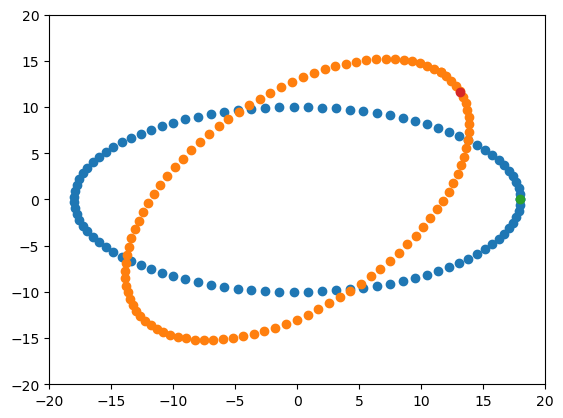

In [300]:
abc1=ellipse(0, 0, 18, 10, rotation=0)
abc1_p=ellipse(0, 0, 18, 10, angle=0, rotation=0)
abc2=ellipse(0, 0, 18, 10, rotation=50)
abc2_p=ellipse(0, 0, 18, 10, angle=50, rotation=50)
plt.scatter(abc1[0], abc1[1])
plt.scatter(abc2[0], abc2[1])
plt.scatter(abc1_p[0], abc1_p[1])
plt.scatter(abc2_p[0], abc2_p[1])
plt.xlim(-20, 20)
plt.ylim(-20, 20)

In [168]:
abc[0]

array([ 18.        ,  17.96376018,  17.85518663,  17.67471655,
        17.42307663,  17.10128012,  16.71062279,  16.25267769,
        15.72928879,  15.14256359,  14.49486464,  13.78879998,
        13.02721269,  12.21316941,  11.34994801,  10.44102437,
         9.49005842,   8.50087935,   7.47747023,   6.42395199,
         5.34456676,   4.24366084,   3.1256672 ,   1.9950876 ,
         0.85647448,  -0.28558735,  -1.42649922,  -2.56166709,
        -3.68652003,  -4.79652865,  -5.88722334,  -6.95421226,
        -7.99319903,  -9.        ,  -9.97056115, -10.90097437,
       -11.78749321, -12.62654798, -13.41476009, -14.14895571,
       -14.82617847, -15.44370144, -15.99903808, -16.48995223,
       -16.91446717, -17.27087353, -17.55773616, -17.7739    ,
       -17.91849461, -17.99093776, -17.99093776, -17.91849461,
       -17.7739    , -17.55773616, -17.27087353, -16.91446717,
       -16.48995223, -15.99903808, -15.44370144, -14.82617847,
       -14.14895571, -13.41476009, -12.62654798, -11.78

In [173]:
ccc=np.array([np.sqrt(abc[0][i]*abc[0][i]+abc[1][i]*abc[1][i]) for i in range(100)])

In [177]:
bbb=abc.reshape((100,2))

In [185]:
cdist(bbb[0:2], bbb[0:2])

array([[0.        , 0.32329109],
       [0.32329109, 0.        ]])

In [194]:
[[abc[0][i], abc[1][i]] for i in range(100)]

[[18.0, 0.0],
 [17.96376017649392, 0.6342391965656451],
 [17.855186630954314, 1.2659245357374926],
 [17.67471655072872, 1.892512443604102],
 [17.423076625134414, 2.511479871810792],
 [17.10128011933702, 3.120334456984871],
 [16.710622794289307, 3.716624556603276],
 [16.25267768915918, 4.297949120891716],
 [15.72928878725613, 4.861967361004687],
 [15.142563590961261, 5.406408174555976],
 [14.494864635559056, 5.9290792905464045],
 [13.788799976141604, 6.4278760968653925],
 [13.027212685891264, 6.90079011482112],
 [12.21316940802838, 7.345917086575334],
 [11.349948007521405, 7.761464642917568],
 [10.441024372281566, 8.145759520503358],
 [9.490058416989044, 8.497254299495143],
 [8.500879345908288, 8.81453363447582],
 [7.477470234033956, 9.096319953545184],
 [6.423951988653694, 9.341478602651067],
 [5.344566755908948, 9.549022414440739],
 [4.243660839169691, 9.718115683235416],
 [3.1256671980047477, 9.84807753012208],
 [1.9950875982181997, 9.93838464461254],
 [0.8564744848273592, 9.98867339

In [ ]:
np.array([abc[0][i], abc[1][i]])

In [193]:
abc[0][1]

17.96376017649392

In [190]:
bbb

array([[ 1.80000000e+01,  1.79637602e+01],
       [ 1.78551866e+01,  1.76747166e+01],
       [ 1.74230766e+01,  1.71012801e+01],
       [ 1.67106228e+01,  1.62526777e+01],
       [ 1.57292888e+01,  1.51425636e+01],
       [ 1.44948646e+01,  1.37888000e+01],
       [ 1.30272127e+01,  1.22131694e+01],
       [ 1.13499480e+01,  1.04410244e+01],
       [ 9.49005842e+00,  8.50087935e+00],
       [ 7.47747023e+00,  6.42395199e+00],
       [ 5.34456676e+00,  4.24366084e+00],
       [ 3.12566720e+00,  1.99508760e+00],
       [ 8.56474485e-01, -2.85587349e-01],
       [-1.42649922e+00, -2.56166709e+00],
       [-3.68652003e+00, -4.79652865e+00],
       [-5.88722334e+00, -6.95421226e+00],
       [-7.99319903e+00, -9.00000000e+00],
       [-9.97056115e+00, -1.09009744e+01],
       [-1.17874932e+01, -1.26265480e+01],
       [-1.34147601e+01, -1.41489557e+01],
       [-1.48261785e+01, -1.54437014e+01],
       [-1.59990381e+01, -1.64899522e+01],
       [-1.69144672e+01, -1.72708735e+01],
       [-1.

In [156]:
from scipy.spatial import distance
bbb=abc.reshape(100,2)
data=cdist(bbb, np.array([[0, 0]]))

In [135]:
data=cdist(bbb, bbb, metric='euclidean')

In [250]:
ttt=ellipse(0, 0, 18, 10, angles[i], rotation=40)

In [287]:
ttt=ellipse(0, 0, 18, 10, rotation=40)
new=[[ttt[0][i],ttt[1][i]] for i in range(len(ttt[0]))]
new=np.array(new)

ttt1=ellipse(0, 0, 18, 10, rotation=0)
new1=[[ttt1[0][i],ttt1[1][i]] for i in range(len(ttt1[0]))]
new1=np.array(new1)

In [288]:
sites=np.where(cdist(new, new)==cdist(new, new).max())
sites1=np.where(cdist(new1, new1)==cdist(new1, new1).max())

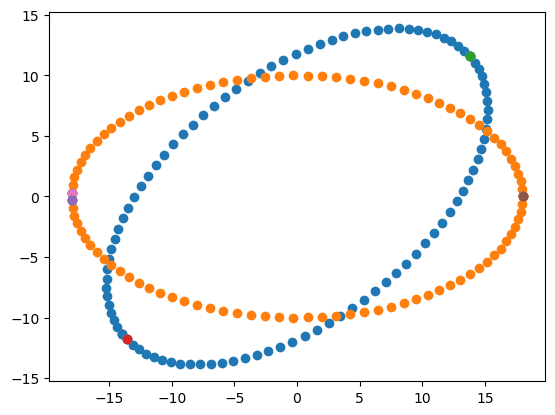

In [289]:
plt.scatter(new[:,0], new[:,1])
plt.scatter(new1[:,0], new1[:,1])
for i in range(len(sites[0])):
    plt.scatter(new[sites[0][i]][0], new[sites[0][i]][1])
    plt.scatter(new[sites[1][i]][0], new[sites[1][i]][1])

    plt.scatter(new1[sites1[0][i]][0], new1[sites1[0][i]][1])
    plt.scatter(new1[sites1[1][i]][0], new1[sites1[1][i]][1])

In [146]:
ellipse(0, 0, 10, 12, angles[i], rotation=0)[0].max()

10.0

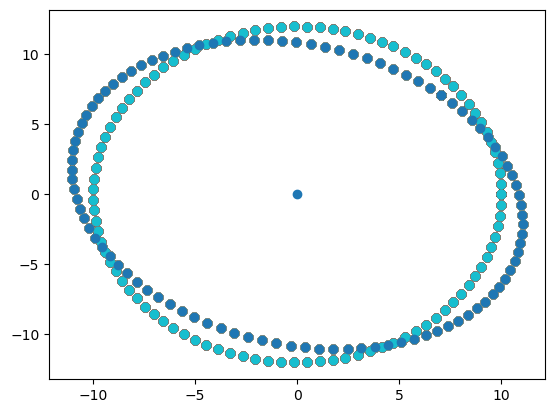

In [140]:
angles = np.linspace(0, 360, 100)
plt.scatter(0, 0)
for i in range(100):
    x0=ellipse(0, 0, 10, 12, angles[i], rotation=0)[0]
    y0=ellipse(0, 0, 10, 12, angles[i], rotation=0)[1]
    x=ellipse(0, 0, 10, 12, angles[i], rotation=45)[0]
    y=ellipse(0, 0, 10, 12, angles[i], rotation=45)[1]
    plt.scatter(x0, y0)
    plt.scatter(x, y)



In [36]:
Ell_rot = np.zeros((2,2))

In [37]:
t = np.linspace(0, 2*pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  

In [38]:
Ell.shape

(2, 100)

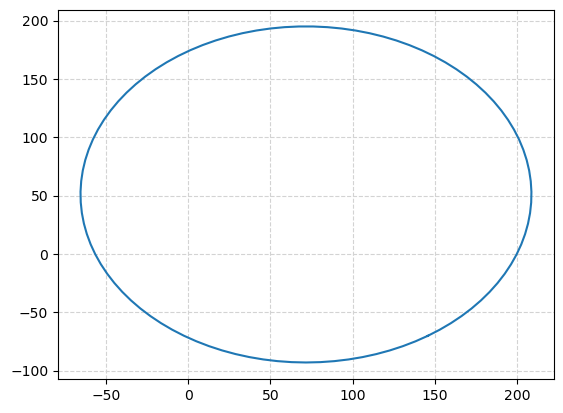

In [33]:
from math import pi
t = np.linspace(0, 2*pi, 100)
plt.plot(u+a*np.cos(t-1) , v+b*np.sin(t-1))
plt.grid(color='lightgray',linestyle='--')
plt.show()

(221.72694396972656, 136.5004119873047) (118.32049560546875, 242.3022918701172) 92.30658721923828
(71.65994262695312, 51.000091552734375) (137.08111572265625, 144.0441131591797) 1.0275471210479736


-1

<Figure size 640x480 with 0 Axes>

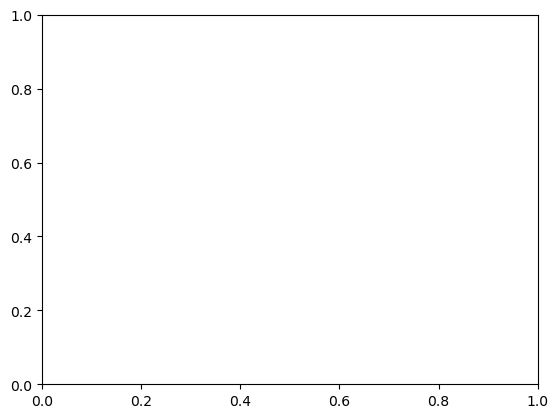

In [197]:
import cv2
import numpy as np
from matplotlib.colors import Normalize

# # Load the image
img = cv2.imread('image3.png')



kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (17, 17))
background = cv2.dilate(foreground, kernel, iterations=3)
unknown = cv2.subtract(background, foreground)
cv2.imshow('Background', background)
cv2.waitKey(10)
cv2.destroyAllWindows()



# Convert the image to grayscale
gray = background

background[background==255] = 5
background[background==0] = 255
background[background==5] = 0

# Apply a threshold to the image to
# separate the objects from the background
ret, thresh = cv2.threshold(
	gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find the contours of the objects in the image
contours, hierarchy = cv2.findContours(
	thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and calculate the area of each object
# cv2.imshow('image', background)
# cv2.imshow('image', img[:,:,0])
figure=plt.figure()
fig, ax = plt.subplots()
for cnt in contours:
	
	area = cv2.contourArea(cnt)


	# Draw a bounding box around each
	# object and display the area on the image
	x, y, w, h = cv2.boundingRect(cnt)
	cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
	cv2.putText(img, str(area), (x, y+100),
				cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
	# cv2.rectangle(background, (x, y), (x+w, y+h), (255, 255, 0), 2)
	# cv2.putText(background, str(area), (x, y+100),
	# 			cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)
	
	xy, width_height, angle = cv2.fitEllipse(cnt)
	plt.plot
	print(xy, width_height, angle)
	# plot_ellipse(ax, xy[0], xy[1], width_height[0], width_height[1], angle, 'r')
	# plot_ellipse(ax, 264, 163, 134, 163, 115, 'r')
	# print((109.66650390625, 105.74824523925781),(188.27984619140625, 395.2646179199219), angle)
	# cv2.ellipse(img, (109.66650390625, 105.74824523925781),(188.27984619140625, 395.2646179199219), angle,0, 360)
	# cv2.ellipse(background, (int(xy[0]), int(xy[1])), (int(width_height[0]/2), int(width_height[1]/2)), angle, 0, 360, (0, 255, 255), 2)
	# cv2.waitKey(10)
	cv2.ellipse(img, (int(xy[0]), int(xy[1])), (int(width_height[0]/2), int(width_height[1]/2)), angle, 0, 360, (0, 255, 255), 2)
	cv2.waitKey(10)
	# Drawing_colored_ellipse = Ellipse(xy, width_height[0], width_height[1], angle)
    # ax.add_artist(Drawing_colored_ellipse)
   
	# cv2.rectangle(background, (x, y), (x+w, y+h), (0, 255, 0), 2)
	# cv2.putText(background, str(area), (x, y+100),
	# 			cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2)

# Show the final image with the bounding boxes
# and areas of the objects overlaid on top
# cv2.imshow('image', img)
# plt.imshow(background)
cv2.imshow('image', background)
cv2.imshow('image', img)
cv2.waitKey(10)
# cv2.destroyAllWindows()

# Code By SR.Dhanush


In [128]:
xy, width_height, angle=cv2.fitEllipse(cnt)

In [129]:
width_height

(167.87420654296875, 210.2066192626953)

In [96]:
area = cv2.contourArea(cnt)

In [101]:
def blob_properties(contours):
  cont_props= []
  i = 0
  for cnt in contours:
    area= cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    convexity = cv2.isContourConvex(cnt)
    x1,y1,w,h = cv2.boundingRect(cnt)
    x2 = x1+w
    y2 = y1+h
    aspect_ratio = float(w)/h
    rect_area = w*h
    extent = float(area)/rect_area
    hull = cv2.convexHull(cnt)
    hull_area = cv2.contourArea(hull)
    solidity = float(area)/hull_area
    (xa,ya),(MA,ma),angle = cv2.fitEllipse(cnt)
    rect = cv2.minAreaRect(cnt)
    (xc,yc),radius = cv2.minEnclosingCircle(cnt)
    ellipse = cv2.fitEllipse(cnt)
    rows,cols = img.shape[:2]
    [vx,vy,xf,yf] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
    lefty = int((-xf*vy/vx) + yf)
    righty = int(((cols-xf)*vy/vx)+yf)
    # Add parameters to list
    add = i+1, area, round(perimeter, 1), convexity, round(aspect_ratio, 3), round(extent, 3), w, h, round(hull_area, 1), round(angle, 1), x1, y1, x2, y2,round(radius, 6), xa, ya, xc, yc, xf[0], yf[0], rect, ellipse, vx[0], vy[0], lefty, righty
    cont_props.append(add)
    i += 1

  return cont_props

In [103]:
cv2.arcLength(contours[0], True)

541.9137753248215

In [104]:
cv2.boundingRect(contours[0])

(187, 88, 163, 140)

In [106]:
cv2.minEnclosingCircle(contours[0])

((272.32867431640625, 168.4163360595703), 86.11146545410156)

In [122]:
xy, width_height, angle=cv2.fitEllipse(contours[0])
Ellipse(xy, width_height[0], width_height[1], angle)


((264.5332946777344, 163.957763671875),
 (134.3663787841797, 163.70431518554688),
 115.2910385131836)

In [107]:
plt.Circle(cv2.minEnclosingCircle(contours[0]))


In [120]:
from matplotlib.patches import Ellipse
Ellipse((264.5332946777344, 163.957763671875), 134.3663787841797, 163.70431518554688, angle=115.2910385131836)

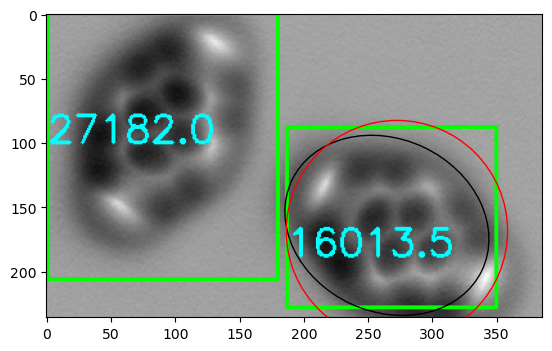

In [125]:
figure, axes = plt.subplots()
plt.imshow(img)
Drawing_colored_circle =plt.Circle((272.32867431640625, 168.4163360595703), 86.11146545410156, fill=False, color='r')
Drawing_colored_ellipse=Ellipse((264.5332946777344, 163.957763671875), 134.3663787841797, 163.70431518554688, angle=115.2910385131836, fill=False)
axes.set_aspect( 1 )
axes.add_artist( Drawing_colored_ellipse)
axes.add_artist( Drawing_colored_circle)
plt.show()


In [39]:
background.shape

(236, 386)

In [19]:
background[background==255] = 5
background[background==0] = 255
background[background==5] = 0

In [12]:
contours, hierarchy = cv2.findContours(
	thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
hierarchy

array([[[-1, -1, -1, -1]]], dtype=int32)

In [8]:
markers = cv2.connectedComponents(foreground)[1]
markers += 1  # Add one to all labels so that background is 1, not 0
markers[unknown==255] = 0  # mark the region of unknown with zero
markers = cv2.watershed(img, markers)

In [9]:
hue_markers = np.uint8(179*np.float32(markers)/np.max(markers))
blank_channel = 255*np.ones((h, w), dtype=np.uint8)
marker_img = cv2.merge([hue_markers, blank_channel, blank_channel])
marker_img = cv2.cvtColor(marker_img, cv2.COLOR_HSV2BGR)
cv2.imshow('Colored markers', marker_img)
cv2.waitKey(10)

-1

In [10]:

labeled_img = img.copy()
labeled_img[markers>1] = marker_img[markers>1]  # 1 is background color
labeled_img = cv2.addWeighted(img, 0.5, labeled_img, 0.5, 0)
cv2.imshow('watershed_result.png', labeled_img)
cv2.waitKey(10)

-1

In [26]:
import pandas as pd

In [28]:
aaa=pd.DataFrame(dark_image_grey.flatten())

In [31]:
aaa

,0
0,184
1,188
2,186
3,190
4,195
...,...
33315,189
33316,190
33317,196
33318,195


<Axes: ylabel='Frequency'>

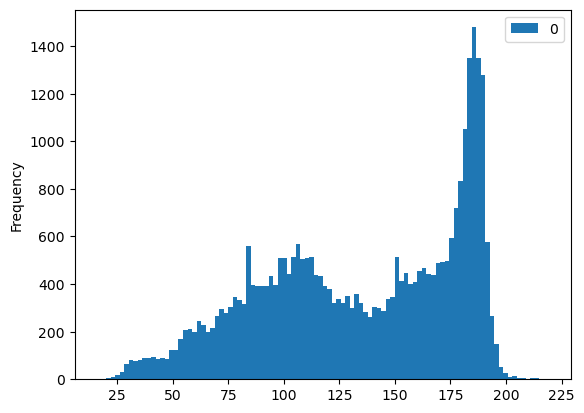

In [34]:
aaa.plot.hist( bins=100)

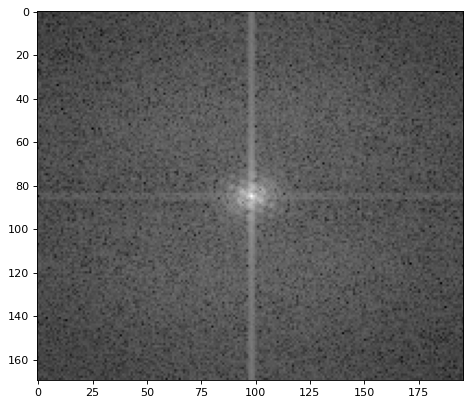

In [20]:
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');


In [15]:
a,b=blob_detection(img2)

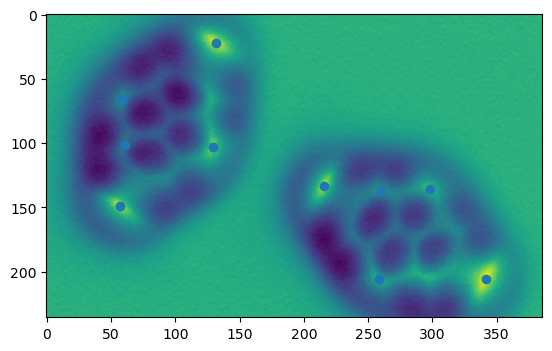

In [12]:
plt.imshow(img2)
plt.scatter(a[:,0], a[:,1])

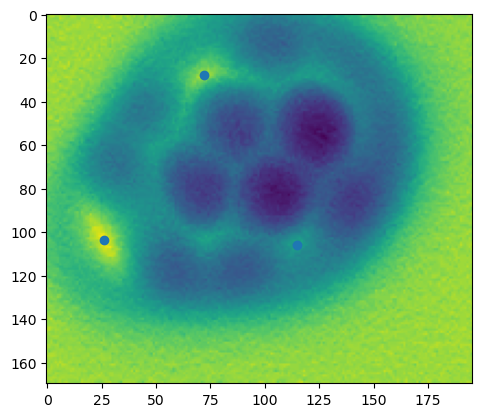

In [9]:
plt.imshow(img1)
plt.scatter(a[:,0], a[:,1])

In [11]:
cv2.imread('image1.png')[:,:,0].shape # BGR to RGB

(170, 196)

In [2]:
# Read the input image
img = cv2.imread('image1.png')

# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding in the gray image to create a binary image
ret,thresh = cv2.threshold(gray,150,255,0)

# Find the contours using binary image
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours in image:",len(contours))
cnt = contours[0]

# compute the area and perimeter
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt, True)
perimeter = round(perimeter, 4)
print('Area:', area)
print('Perimeter:', perimeter)


Number of contours in image: 66
Area: 0.0
Perimeter: 0.0


In [3]:
img1 = cv2.drawContours(img, [cnt], -1, (0,255,255), 3)
x1, y1 = cnt[0,0]
# cv2.putText(img1, f'Area:{area}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
# cv2.putText(img1, f'Perimeter:{perimeter}', (x1, y1+20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [4]:
cv2.imshow("Image", img)

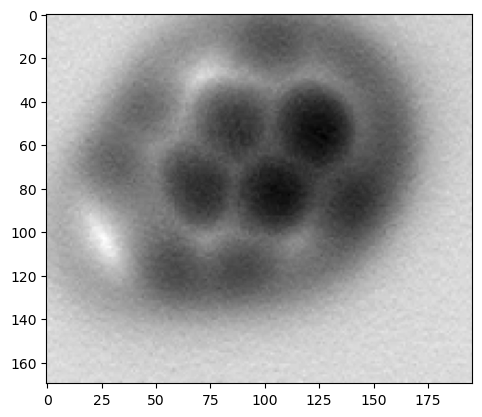

In [32]:
plt.imshow(img1_gray, cmap='gray')

In [16]:
img1.shape

(170, 196, 3)

In [26]:
atom_detection(img1, np.array([0,0]), np.array([180,180]))

[[71.86883745 75.86868774 73.86853803 ... 74.83994326 75.83979355
  72.83964384]
 [67.59863163 78.59848191 83.5983322  ... 71.56973744 80.56958773
  67.56943802]
 [79.3284258  74.32827609 73.32812638 ... 75.29953162 70.29938191
  72.2992322 ]
 ...
 [33.74446528 34.74431557 34.74416586 ... 30.7155711  27.71542139
  26.71527167]
 [32.47425946 34.47410975 36.47396004 ... 32.44536528 30.44521556
  27.44506585]
 [31.20405364 26.20390393 31.20375422 ... 38.17515945 37.17500974
  34.17486003]] 128.0350862947598


array([], shape=(0, 2), dtype=float64)

In [352]:
iodine = cv2.imread('iodine.png')
beneze = cv2.imread('beneze.png')
iodinebeneze = cv2.imread('iodinebeneze.png')
iodine_beneze = cv2.imread('iodine_beneze.png')
two_beneze = cv2.imread('two_beneze.png')
biphenyl = cv2.imread('biphenyl.png')

In [8]:
iodine=cv2.resize(iodine, (150, 150))
beneze=cv2.resize(beneze, (150, 150))
iodinebeneze = cv2.resize(iodinebeneze, (150, 150))
iodine_beneze = cv2.resize(iodine_beneze, (150, 150))
two_beneze = cv2.resize(two_beneze, (150, 150))
biphenyl = cv2.resize(biphenyl, (150, 150))

# grey image and binary

In [32]:
def get_binary_img(img):
    # gray img to bin image
    bin_img = np.zeros(shape=(img.shape), dtype=np.uint8)
    h = img.shape[0]
    w = img.shape[1]
    for i in range(h):
        for j in range(w):
            bin_img[i][j] = 255 if img[i][j] < 255 else 0
    return bin_img

# 灰度化

iodine_gray=cv2.cvtColor(iodine, cv2.COLOR_BGR2GRAY)
beneze_gray=cv2.cvtColor(beneze, cv2.COLOR_BGR2GRAY)
iodinebeneze_gray = cv2.cvtColor(iodinebeneze,cv2.COLOR_BGR2GRAY)
iodine_beneze_gray = cv2.cvtColor(iodine_beneze, cv2.COLOR_BGR2GRAY)
two_beneze_gray = cv2.cvtColor(two_beneze, cv2.COLOR_BGR2GRAY)
biphenyl_gray = cv2.cvtColor(biphenyl, cv2.COLOR_BGR2GRAY)

# 二值化
# bin_img1 = get_binary_img(gray_img1)
# bin_img2 = get_binary_img(gray_img2)
for i in range(len(all_imgs_gray)):
    ret1, all_imgs_thresh_label[i] = cv2.threshold(all_imgs_gray[i], 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)



In [33]:
iodine_thresh, beneze_thresh, iodinebeneze_thresh, iodine_beneze_thresh, two_beneze_thresh,biphenyl_thresh=all_imgs_thresh_label

In [34]:
all_imgs_thresh=[iodine_thresh, beneze_thresh, iodinebeneze_thresh, iodine_beneze_thresh, two_beneze_thresh,biphenyl_thresh]

In [20]:
all_imgs=[iodine, beneze, iodinebeneze, iodine_beneze, two_beneze,biphenyl]
all_imgs_gray=[iodine_gray, beneze_gray, iodinebeneze_gray, iodine_beneze_gray, two_beneze_gray,biphenyl_gray]
#all_imgs_thresh=[iodine_thresh, beneze_thresh, iodinebeneze_thresh, iodine_beneze_thresh, two_beneze_thresh,biphenyl_thresh]
all_imgs_label=['iodine', 'beneze', 'iodinebeneze', 'iodine_beneze', 'two_beneze','biphenyl']
all_imgs_thresh_label=['iodine_thresh', 'beneze_thresh', 'iodinebeneze_thresh', 'iodine_beneze_thresh', 'two_beneze_thresh','biphenyl_thresh']

In [14]:
all_imgs_gray_label=['iodine_gray', 'beneze_gray', 'iodinebeneze_gray', 'iodine_beneze_gray', 'two_beneze_gray','biphenyl_gray']

In [39]:
all_imgs_thresh_label=['iodine_thresh', 'beneze_thresh', 'iodinebeneze_thresh', 'iodine_beneze_thresh', 'two_beneze_thresh','biphenyl_thresh']

In [76]:
all_imgs_thresh_label

['iodine_thresh',
 'beneze_thresh',
 'iodinebeneze_thresh',
 'iodine_beneze_thresh',
 'two_beneze_thresh',
 'biphenyl_thresh']

In [35]:
iodine_thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [38]:
all_imgs_thresh

[array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   

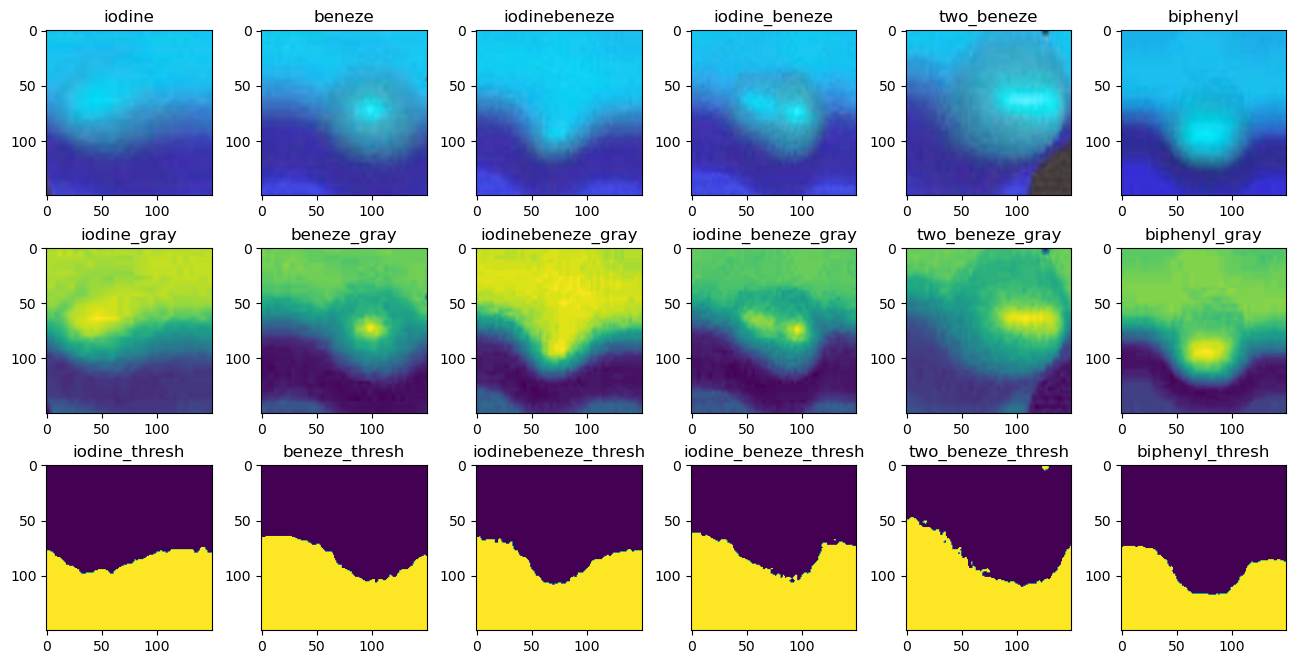

In [40]:
plt.figure(figsize=(16, 8))
for i in range(6):
    plt.subplot(3,6,i+1)
    plt.title(all_imgs_label[i])
    plt.imshow(all_imgs[i])
    plt.subplot(3,6,i+1+6)
    plt.title(all_imgs_gray_label[i])
    plt.imshow(all_imgs_gray[i])
    plt.subplot(3,6,i+1+12)
    plt.title(all_imgs_thresh_label[i])
    plt.imshow(all_imgs_thresh[i])
   
    
plt.subplots_adjust(wspace=0.3, hspace=0.2)

In [41]:
img=iodinebeneze

In [42]:
from sklearn.feature_extraction import image
mask = img.astype(bool)

graph = image.img_to_graph(img, mask=mask)

In [43]:
graph.data = np.exp(-graph.data / graph.data.std())

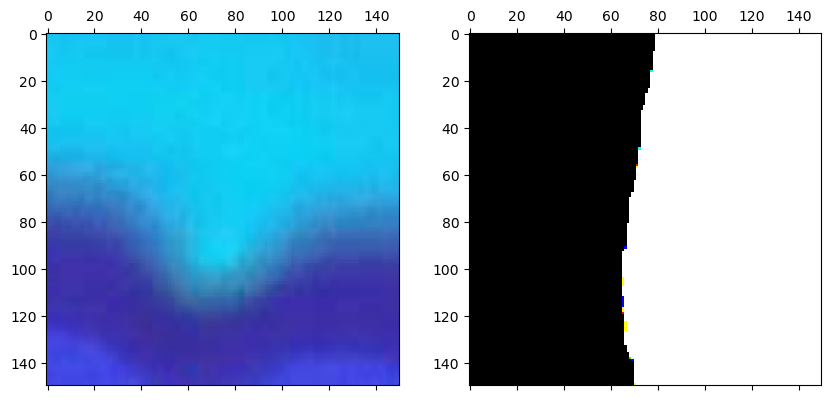

In [45]:
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering

labels = spectral_clustering(graph, n_clusters=2, eigen_solver="arpack")
label_im = np.full(mask.shape, -1.0)
label_im[mask] = labels

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
axs[0].matshow(img)
axs[1].matshow(label_im)

plt.show()

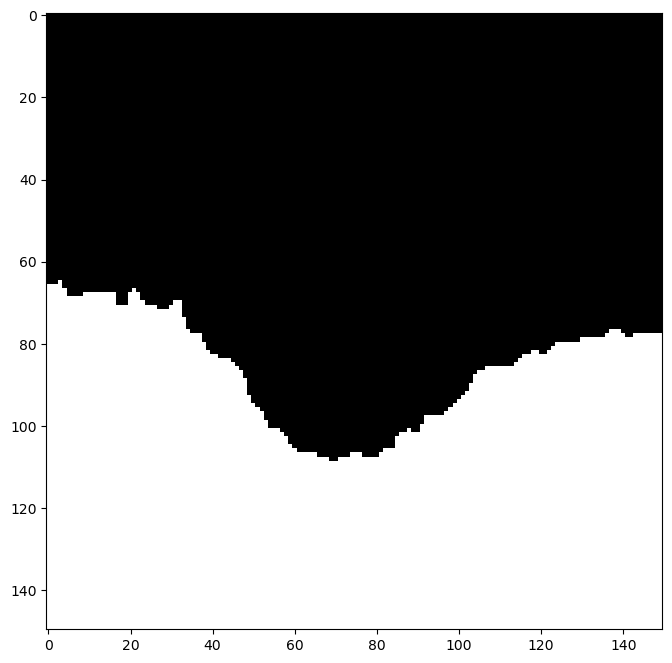

In [36]:
ret1, thresh1 = cv2.threshold(gray_img1, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(thresh1,cmap="gray")

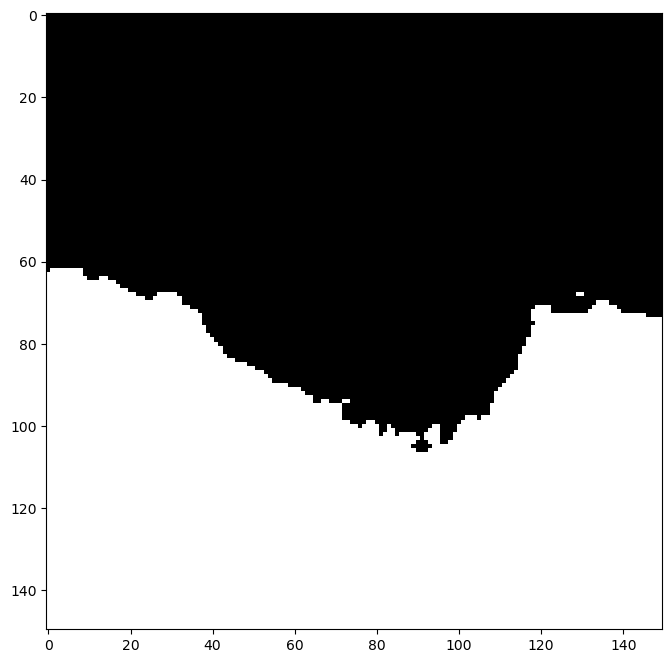

In [37]:
ret2, thresh2 = cv2.threshold(gray_img2, 0, 255,cv2.THRESH_BINARY_INV +cv2.THRESH_OTSU)
plt.figure(figsize=(8,8))
plt.imshow(thresh2,cmap="gray")

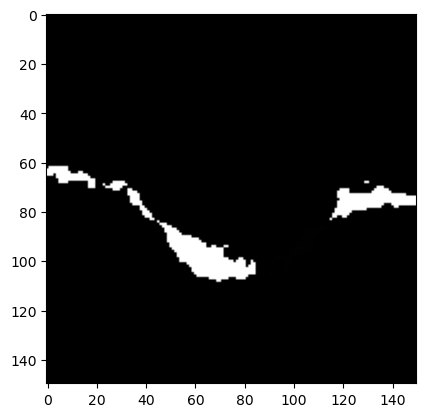

In [39]:
plt.imshow(thresh2-thresh1,cmap="gray")

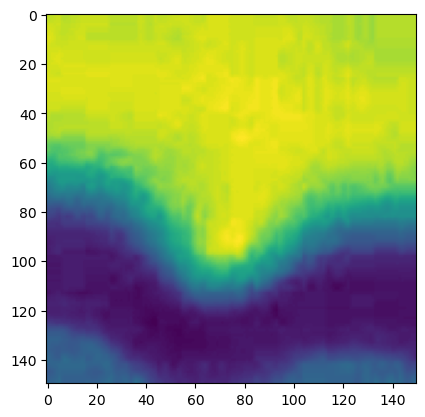

In [31]:
plt.imshow(gray_img1)

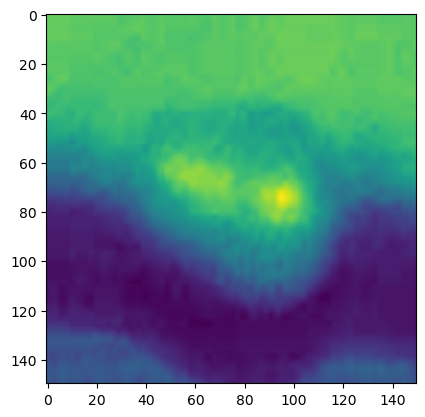

In [32]:
plt.imshow(gray_img2)

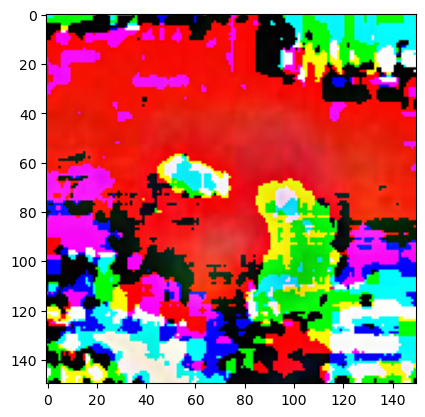

In [16]:
plt.imshow(img1-img2)